In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler,MinMaxScaler,PowerTransformer,FunctionTransformer
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set(rc={'figure.figsize':(8,8)})

In [ ]:
data=pd.read_csv("CarPrice_Assignment.csv")

In [ ]:
data.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# EDA

In [ ]:
data.shape

(205, 26)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### NUMERICAL COLUMN

In [ ]:
numerical_cols=data.select_dtypes(exclude=['object']).columns

In [ ]:
data[numerical_cols].head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


### CATEGORICAL COLUMNS 

In [ ]:
categorical_cols=data.select_dtypes(include=['object']).columns

In [ ]:
data[categorical_cols].head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [ ]:
data.isnull().any()
data.isnull().sum()/ data.shape[0]

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

In [ ]:
data.duplicated().sum()

0

Tidak ada null dan duplicate values

In [ ]:
data.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


car_ID              0.000000
symboling           0.211072
wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginesize          1.947655
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               1.777678
dtype: float64

there are skewness right in  'compressionratio','horsepower','wheelbase', 'carwidth','enginesize' and price

let's visualization  the column!

In [ ]:
#get features and target columns 
X=data
y=data.price
X.shape

(205, 26)

In [ ]:
#finding skewed columns using this function
def distribution(data):
    #let find the skewed col and fix them
    skew_limit=0.75 # limit for skewed col
    skew_vals=data[numerical_cols].skew()
    skew_col=skew_vals[abs(skew_vals)>skew_limit].sort_values(ascending =False)
    
    #graphically represent the skewed col
    i=1    
    print("Columns names: ",skew_col.index)
    print(skew_col)
    plt.figure(figsize=(30,30))
    for col in skew_col.index:
        plt.subplot(5,2,i)
        sns.histplot(X[col],color="r",kde=True)
        plt.xticks(fontsize=25)
        plt.yticks(fontsize=25)
        plt.xlabel(col,fontsize=25)
        i=i+1
        

    plt.show()

Columns names:  Index(['compressionratio', 'enginesize', 'price', 'horsepower', 'wheelbase',
       'carwidth'],
      dtype='object')
compressionratio    2.610862
enginesize          1.947655
price               1.777678
horsepower          1.405310
wheelbase           1.050214
carwidth            0.904003
dtype: float64


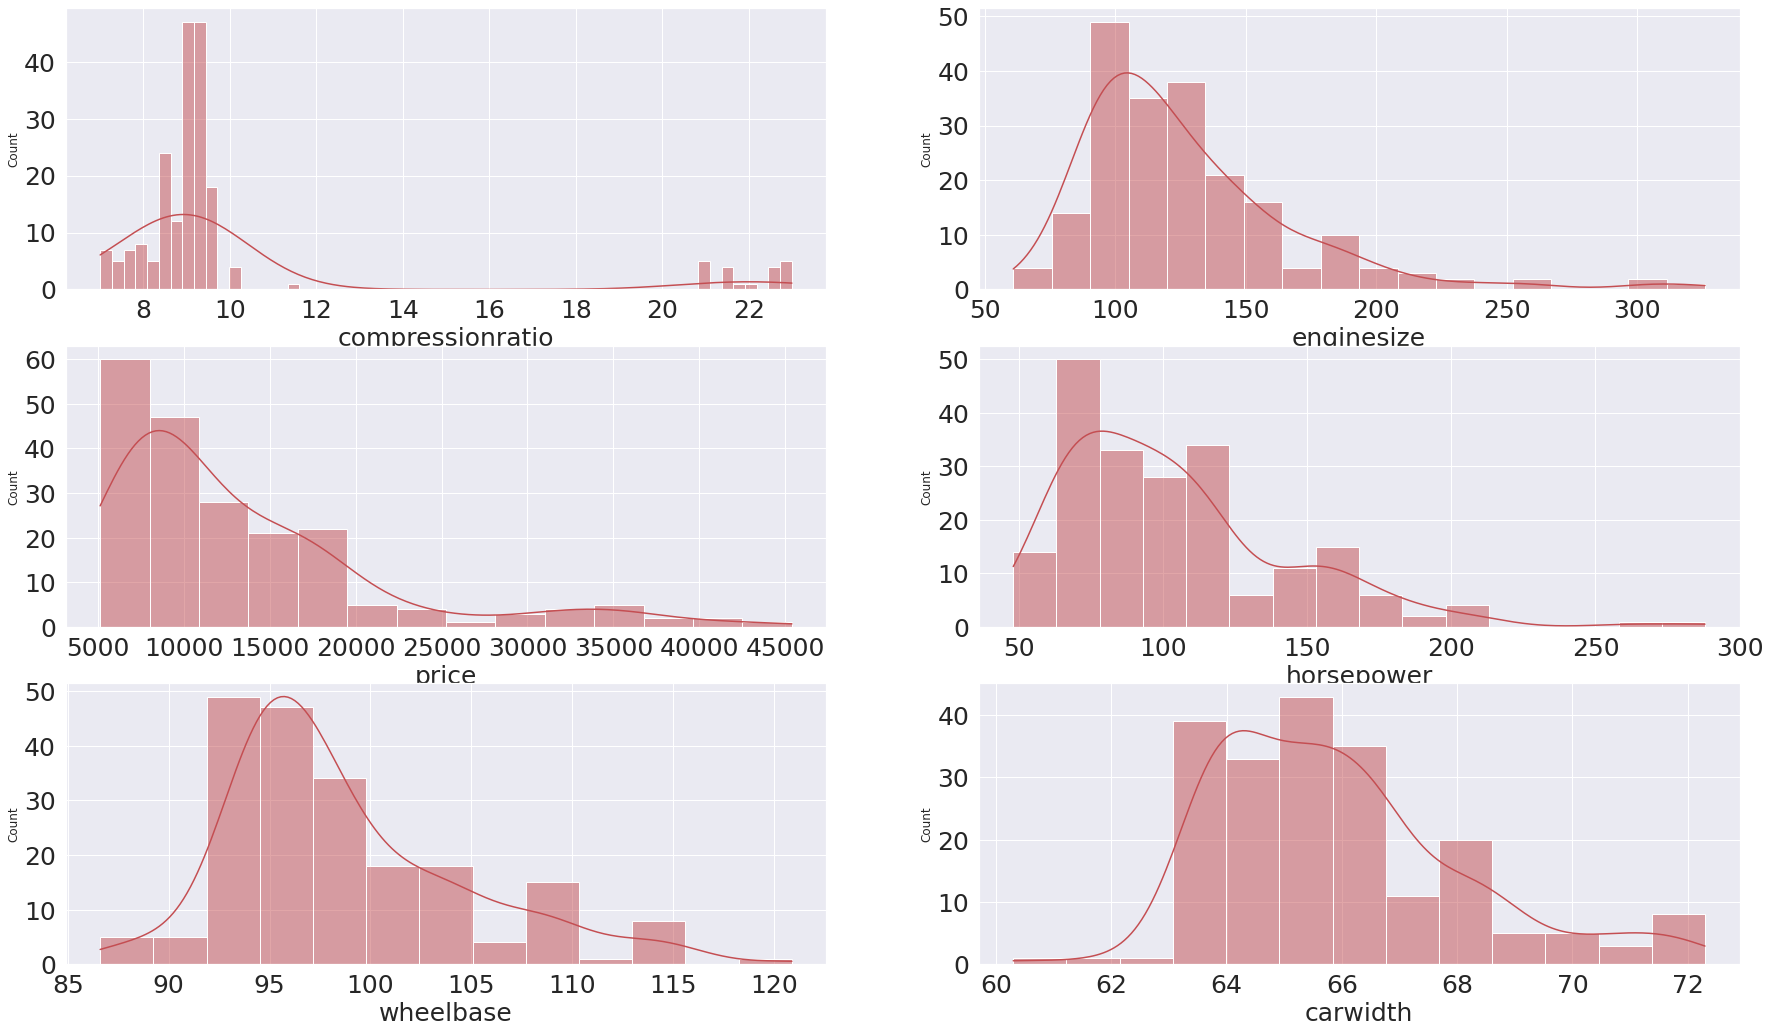

In [ ]:
#calling the function
distribution(X)

There are 6 skewed columns in features columns

(205, 26)

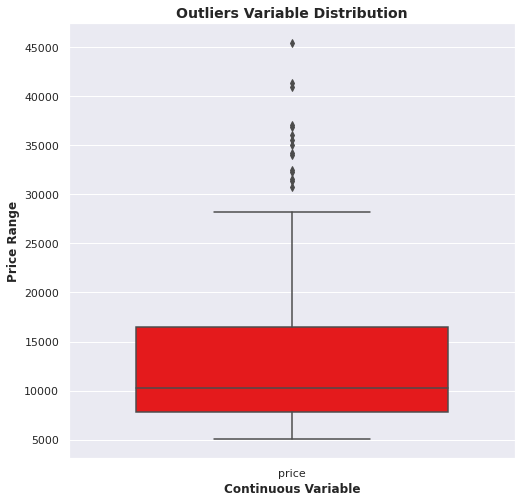

In [ ]:
# Outlier Analysis of target variable with maximum amount of Inconsistency

outliers = ['price']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=data[outliers], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Price Range", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')
data.shape

There are some price ranges above 30000 which can be termed as outliers but lets not remove it rather we will use standarization scaling.

# DATA CLEANSING

In [ ]:
#transform the price col using log transformer
ft=FunctionTransformer(func=np.log1p)
data["price"]=ft.fit_transform(data["price"])

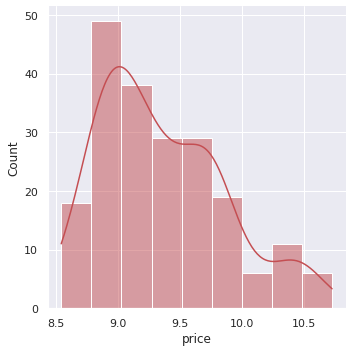

In [ ]:
#after transform the price col
sns.displot(data["price"],color="r",kde=True)

(205, 26)

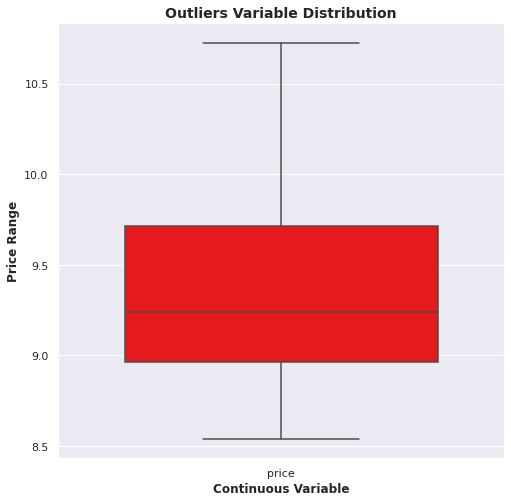

In [ ]:
#Check the outlier in column price after transformation
outliers = ['price']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=data[outliers], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Price Range", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')
data.shape

there's no outlier in the column price anymore

In [ ]:
#fix the skewed columns using function transformer


skew_col=['compressionratio','horsepower','wheelbase', 'carwidth','enginesize'] #these two col perform well for power transform
ft=FunctionTransformer(func=np.log1p)
X[skew_col]=ft.fit_transform(X[skew_col])
X.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,4.495355,168.8,4.175925,48.8,2548,dohc,four,4.875197,mpfi,3.47,2.68,2.302585,4.718499,5000,21,27,9.510149
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,4.495355,168.8,4.175925,48.8,2548,dohc,four,4.875197,mpfi,3.47,2.68,2.302585,4.718499,5000,21,27,9.711176
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,4.559126,171.2,4.197202,52.4,2823,ohcv,six,5.030438,mpfi,2.68,3.47,2.302585,5.043425,5000,19,26,9.711176
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,4.613138,176.6,4.207673,54.3,2337,ohc,four,4.700480,mpfi,3.19,3.40,2.397895,4.634729,5500,24,30,9.543306
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,4.609162,176.6,4.210645,54.3,2824,ohc,five,4.919981,mpfi,3.19,3.40,2.197225,4.753590,5500,18,22,9.767152


Menghapus kolom car_ID karena merupakan pengulangan indeks.

In [ ]:
data=data.drop(['car_ID'],axis=1)

In [ ]:
data['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

Ada beberapa typo di kolom CarName, let's handle it :
- nissan dan nissan sama 
- toyota dan toyouta sama 
- volkswagen, volkswagen dan vw sama 
- mazda dan maxda sama 
- porsche dan porcshce  sama

In [ ]:
data['CarName'] = data['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [ ]:
# mengekstrak car brand dari kolom CarName

CarName= data.CarName.str.split(expand= True)
Brand = CarName[0]
data['Brand']=Brand


In [ ]:
data['Brand'] = data['Brand'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [ ]:
#Dikarenakan features carname sudah tidak diperlukan, dan sudah diekstrak menjadi car brand, maka features carname dihapus

data=data.drop(['CarName'],axis=1)

# VISUALISASI

## CATEGORICAL FEATURES

### CATEGORICAL COLUMNS 

In [ ]:
categorical_cols=data.select_dtypes(include=['object']).columns

In [ ]:
data[categorical_cols].head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,Brand
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


#### CAR BRAND

In [ ]:
df=pd.DataFrame(data['Brand'].value_counts()).reset_index().rename(columns={'index':'car_name','Brand': 'count'})

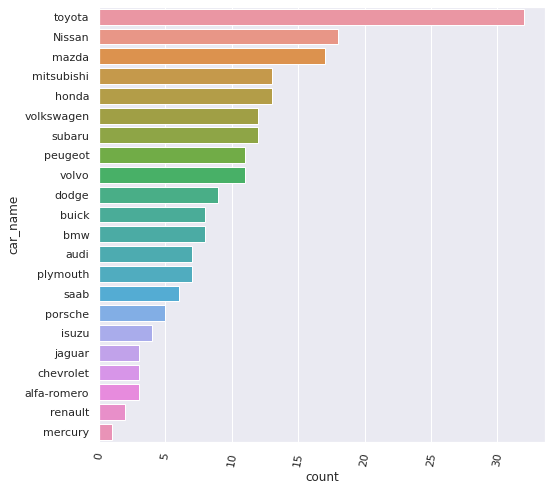

In [ ]:
plot = sns.barplot(y='car_name',x='count',data=df)
plot=plt.setp(plot.get_xticklabels(), rotation=80)

Berdasarkan data tersebut didapatkan info bahwa : 
- Toyota adalah mobil yang paling banyak 
- mercury adalah mobil yang paling sedikit

#### Car Brand vs Average Price

<Figure size 1440x432 with 0 Axes>

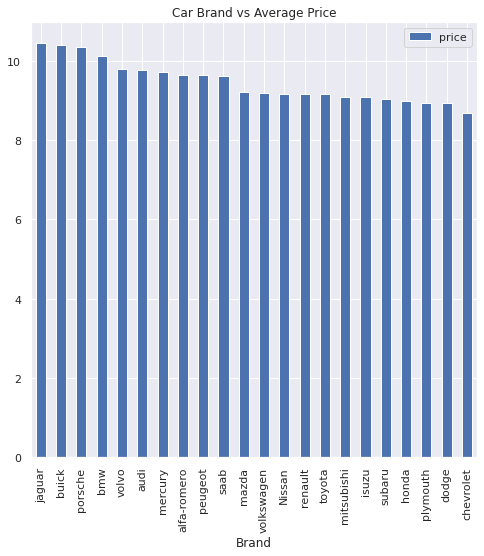

In [ ]:
plt.figure(figsize=(20, 6))

df_autox = pd.DataFrame(data.groupby(['Brand'])['price'].mean().sort_values(ascending = False))
df_autox.plot.bar()
plt.title('Car Brand vs Average Price')
plt.show()

- Jaguar,Buick dan porsche memiliki rata-rata harga lebih tinggi
- Chevrolet merupakan brand yang memiliki harga paling murah

In [ ]:
"""
#Binning the Car Companies based on avg prices of each car Brand.

data['price'] = data['price'].astype('int')
df_auto_temp = data.copy()
t = data.groupby(['Brand'])['price'].mean()
df_auto_temp = df_auto_temp.merge(t.reset_index(), how='left',on='Brand')
bins = [0,10000,20000,40000]
label =['Budget_Friendly','Medium_Range','TopNotch_Cars']
data['Cars_Category'] = pd.cut(df_auto_temp['price_y'],bins,right=False,labels=label)
data
"""

"\n#Binning the Car Companies based on avg prices of each car Brand.\n\ndata['price'] = data['price'].astype('int')\ndf_auto_temp = data.copy()\nt = data.groupby(['Brand'])['price'].mean()\ndf_auto_temp = df_auto_temp.merge(t.reset_index(), how='left',on='Brand')\nbins = [0,10000,20000,40000]\nlabel =['Budget_Friendly','Medium_Range','TopNotch_Cars']\ndata['Cars_Category'] = pd.cut(df_auto_temp['price_y'],bins,right=False,labels=label)\ndata\n"

#### Fueltype vs Average Price

[Text(0, 0.5, 'Average Price'), Text(0.5, 0, 'fueltype')]

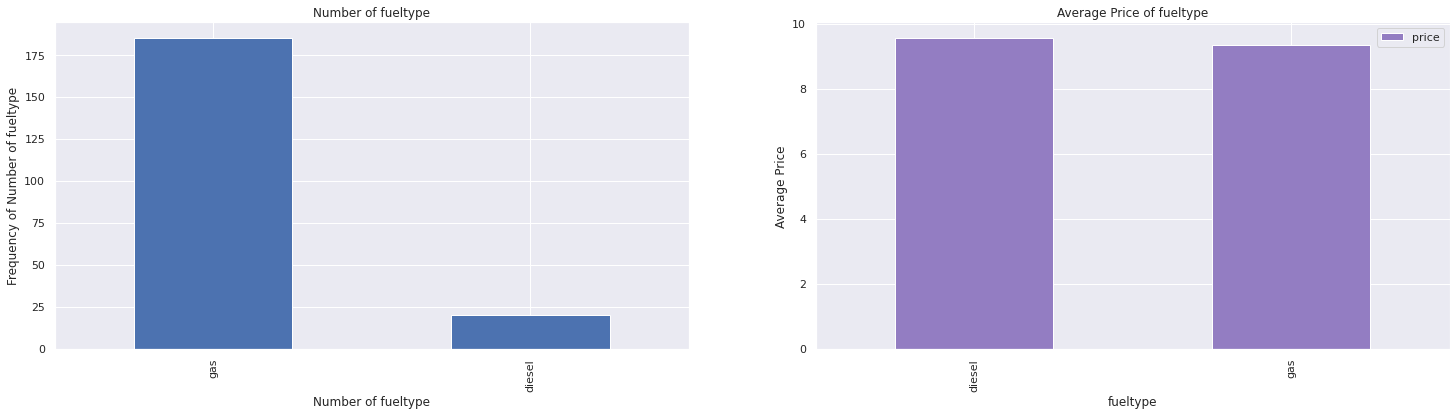

In [ ]:
plt.figure(figsize=(25, 6))

plt.subplot(1,2,1)
plt1 = data['fueltype'].value_counts().plot(kind='bar')
plt.title('Number of fueltype')
plt1.set(xlabel = 'Number of fueltype', ylabel='Frequency of Number of fueltype')

plt.subplot(1,2,2)
df = data.groupby(['fueltype'])['price'].mean().sort_values(ascending = False)
plt1 = df.plot(kind='bar', stacked=True, color='#937DC2')
plt.legend()
plt.title('Average Price of fueltype')
plt1.set(xlabel = 'fueltype', ylabel = 'Average Price')



- mobil dengan fueltype gas lebih banyak digunakan dibandingkan fueltype diesel
- mobil dengan fueltype Diesel lebih mahal dibandingkan mobil dengan fueltype gas.

#### Aspiration VS Average Price

[Text(0, 0.5, 'Average Price'), Text(0.5, 0, 'aspiration')]

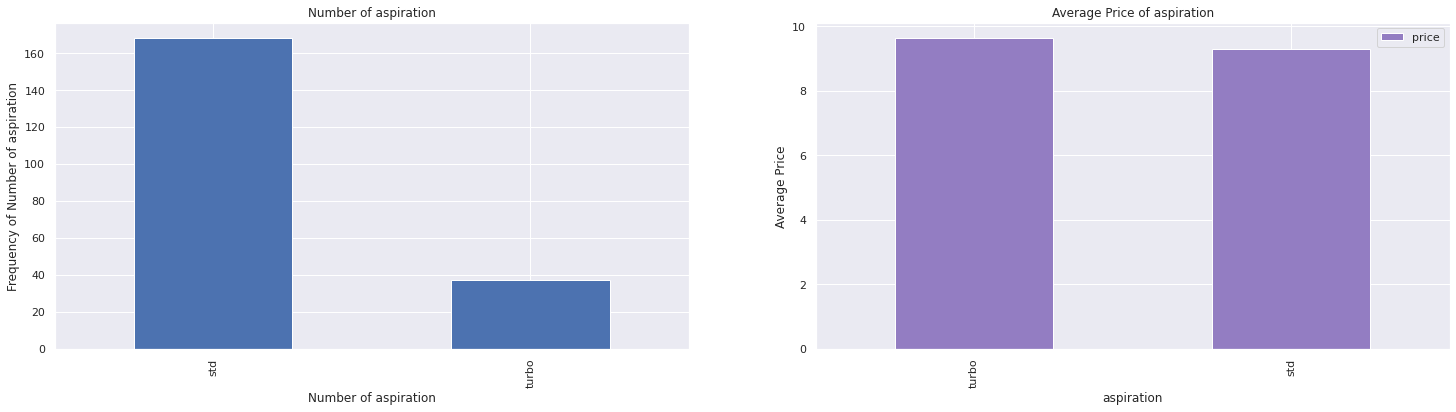

In [ ]:
plt.figure(figsize=(25, 6))

plt.subplot(1,2,1)
plt1 = data['aspiration'].value_counts().plot(kind='bar')
plt.title('Number of aspiration')
plt1.set(xlabel = 'Number of aspiration', ylabel='Frequency of Number of aspiration')

plt.subplot(1,2,2)
df = data.groupby(['aspiration'])['price'].mean().sort_values(ascending = False)
plt1 = df.plot(kind='bar', stacked=True, color='#937DC2')
plt.legend()
plt.title('Average Price of aspiration')
plt1.set(xlabel = 'aspiration', ylabel = 'Average Price')


- jumlah standard aspiration pada dataset lebih banyak daripada turbo aspiration
- Turbo aspiration memiliki rata-rata harga lebih mahal daripada standard aspiration

#### Doornumber VS Average Price

[Text(0, 0.5, 'Average Price'), Text(0.5, 0, 'doornumber')]

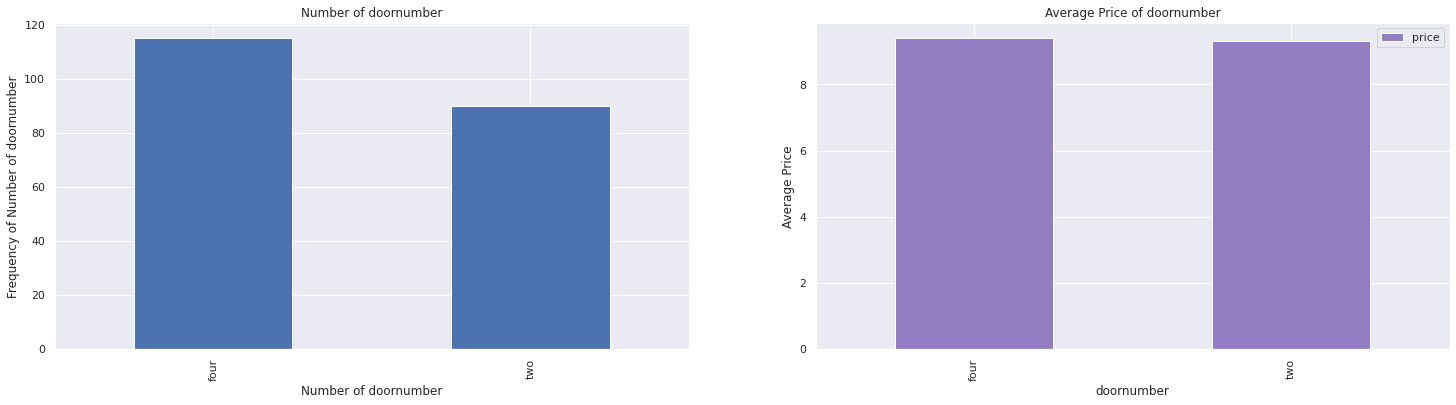

In [ ]:
plt.figure(figsize=(25, 6))

plt.subplot(1,2,1)
plt1 = data['doornumber'].value_counts().plot(kind='bar')
plt.title('Number of doornumber')
plt1.set(xlabel = 'Number of doornumber', ylabel='Frequency of Number of doornumber')

plt.subplot(1,2,2)
df = data.groupby(['doornumber'])['price'].mean().sort_values(ascending = False)
plt1 = df.plot(kind='bar', stacked=True, color='#937DC2')
plt.legend()
plt.title('Average Price of doornumber')
plt1.set(xlabel = 'doornumber', ylabel = 'Average Price')



- doornumber 4 memiliki jumlah lebih banyak pada dataset dibandingkan doornumber 2
- rata-rata harga antara kedua doornumber tidak terlalu berbeda

#### Carbody VS Average Price

[Text(0, 0.5, 'Average Price'), Text(0.5, 0, 'carbody')]

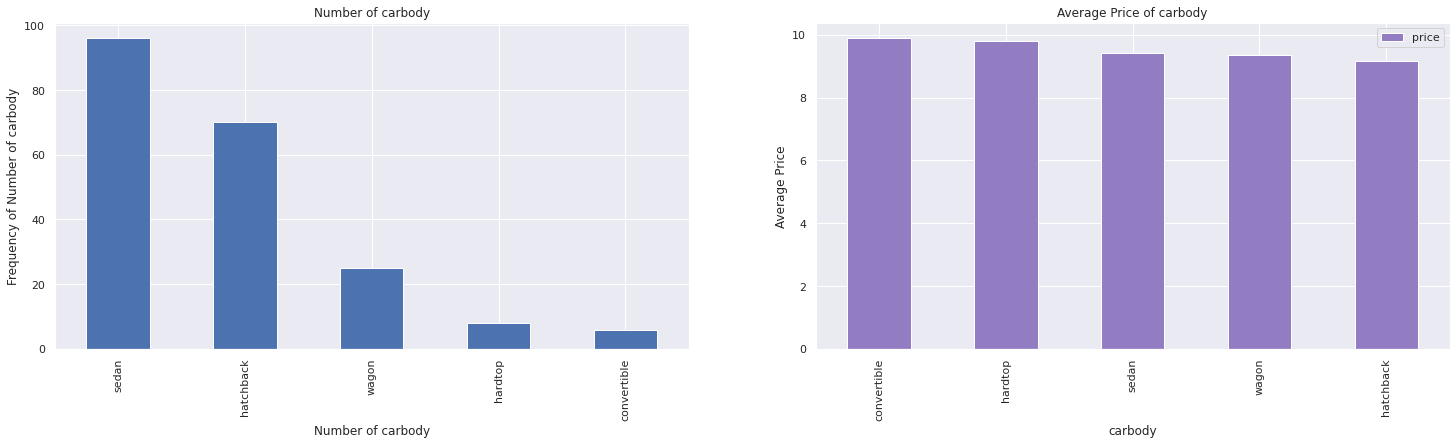

In [ ]:
plt.figure(figsize=(25, 6))

plt.subplot(1,2,1)
plt1 = data['carbody'].value_counts().plot(kind='bar')
plt.title('Number of carbody')
plt1.set(xlabel = 'Number of carbody', ylabel='Frequency of Number of carbody')

plt.subplot(1,2,2)
df = data.groupby(['carbody'])['price'].mean().sort_values(ascending = False)
plt1 = df.plot(kind='bar', stacked=True, color='#937DC2')
plt.legend()
plt.title('Average Price of carbody')
plt1.set(xlabel = 'carbody', ylabel = 'Average Price')




- mobil sedan memiliki jumlah yang lebih banyak dibanding carbody lainnya
- Sementara hatchback cars memiliki rata-rata harga lebih murah, hardtop dan convertibles memiliki rata-rata harga lebih mahal.



#### Drivewheel  VS Average Price

[Text(0, 0.5, 'Average Price'), Text(0.5, 0, 'drivewheel')]

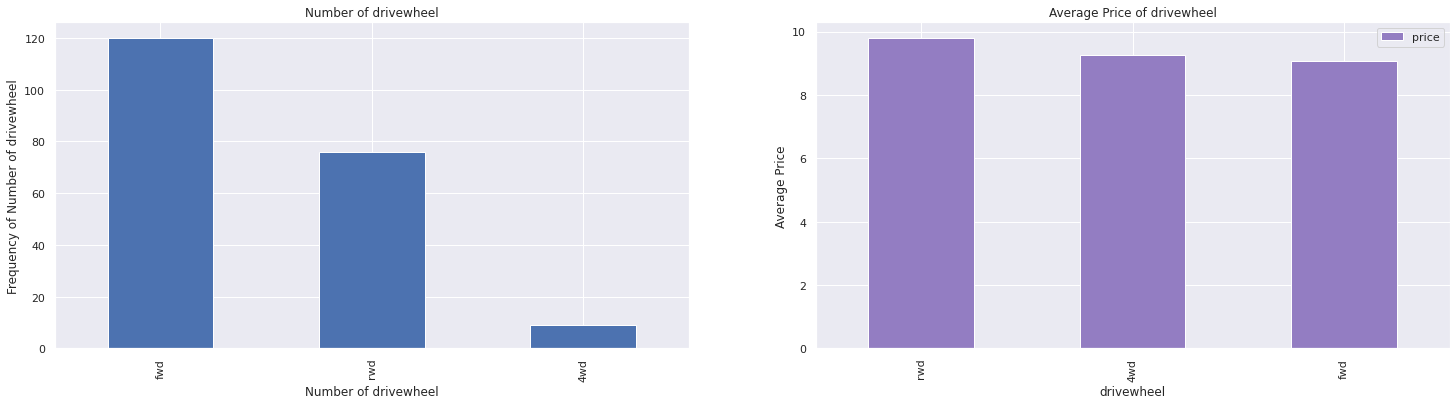

In [ ]:
plt.figure(figsize=(25, 6))

plt.subplot(1,2,1)
plt1 = data['drivewheel'].value_counts().plot(kind='bar')
plt.title('Number of drivewheel')
plt1.set(xlabel = 'Number of drivewheel', ylabel='Frequency of Number of drivewheel')

plt.subplot(1,2,2)
df = data.groupby(['drivewheel'])['price'].mean().sort_values(ascending = False)
plt1 = df.plot(kind='bar', stacked=True, color='#937DC2')
plt.legend()
plt.title('Average Price of drivewheel')
plt1.set(xlabel = 'drivewheel', ylabel = 'Average Price')



- jumlah Rear wheel drive (RWD) cars jauh lebih banyak dibandingkan drivewheel lainnya 
- Rear wheel drive (RWD) cars memiliki rata-rata harga lebih mahal. Front wheel (FWD) cars memiliki rata-rata harga lebih murah.

#### enginelocation  VS Average Price

[Text(0, 0.5, 'Average Price'), Text(0.5, 0, 'enginelocation')]

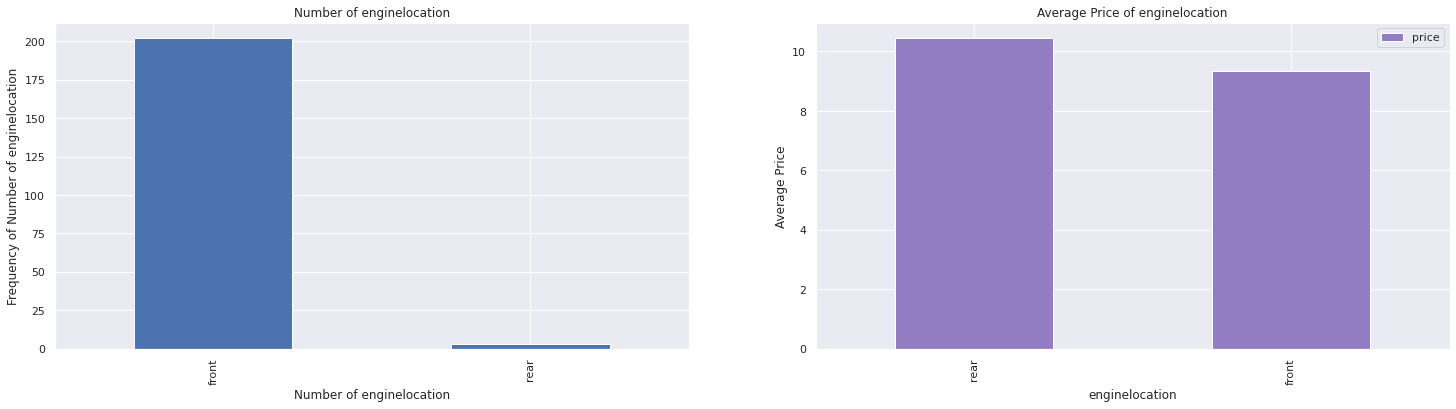

In [ ]:
plt.figure(figsize=(25, 6))

plt.subplot(1,2,1)
plt1 = data['enginelocation'].value_counts().plot(kind='bar')
plt.title('Number of enginelocation')
plt1.set(xlabel = 'Number of enginelocation', ylabel='Frequency of Number of enginelocation')

plt.subplot(1,2,2)
df = data.groupby(['enginelocation'])['price'].mean().sort_values(ascending = False)
plt1 = df.plot(kind='bar', stacked=True, color='#937DC2')
plt.legend()
plt.title('Average Price of enginelocation')
plt1.set(xlabel = 'enginelocation', ylabel = 'Average Price')



- mobil dengan front engine location memiliki jumlah yang jauh lebih banyak dibandingkan rear engine location
- mobil dengan rear engine location memiliki rata-rata harga yang lebih mahal dibandingkan front engine location

#### enginetype VS Average Price

[Text(0, 0.5, 'Average Price'), Text(0.5, 0, 'enginetype')]

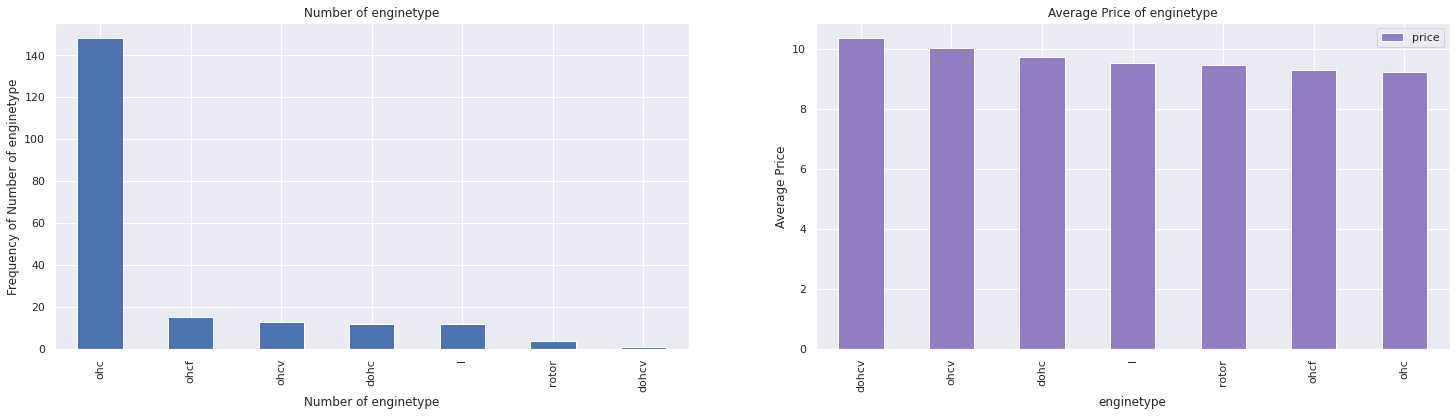

In [ ]:
plt.figure(figsize=(25, 6))

plt.subplot(1,2,1)
plt1 = data['enginetype'].value_counts().plot(kind='bar')
plt.title('Number of enginetype')
plt1.set(xlabel = 'Number of enginetype', ylabel='Frequency of Number of enginetype')

plt.subplot(1,2,2)
df = data.groupby(['enginetype'])['price'].mean().sort_values(ascending = False)
plt1 = df.plot(kind='bar', stacked=True, color='#937DC2')
plt.legend()
plt.title('Average Price of enginetype')
plt1.set(xlabel = 'enginetype', ylabel = 'Average Price')



- mobil dengan enginetype ohc memiliki jumlah yang jauh lebih banyak dibanding enginetype lainnya
- Dataset  memiliki 7 enginetype yang berbeda dan rata-rata harga di antaranya tidak jauh berbeda

#### Cylindernumber VS Average Price

[Text(0, 0.5, 'Average Price'), Text(0.5, 0, 'cylindernumber')]

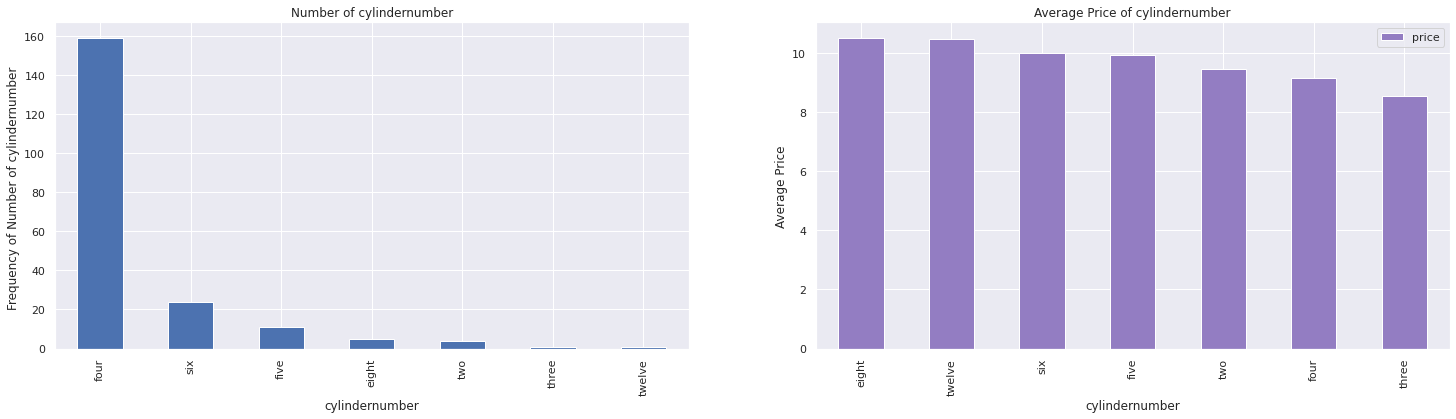

In [ ]:
plt.figure(figsize=(25, 6))

plt.subplot(1,2,1)
plt1 = data['cylindernumber'].value_counts().plot(kind='bar')
plt.title('Number of cylindernumber')
plt1.set(xlabel = 'cylindernumber', ylabel='Frequency of Number of cylindernumber ')


plt.subplot(1,2,2)
df = data.groupby(['cylindernumber'])['price'].mean().sort_values(ascending = False)
plt1 = df.plot(kind='bar', stacked=True, color='#937DC2')
plt.legend()
plt.title('Average Price of cylindernumber')
plt1.set(xlabel = 'cylindernumber', ylabel = 'Average Price')





- Jumlah silinder yang digunakan di sebagian besar mobil adalah empat.
- rata-rata harga mobil dengan cylindernumber 8 dan 12 lebih mahal, sedangkan cylindernumber 3 memiliki rata-rata harga lebih murah dibanding yang lainnya

#### fuelsystem VS Average Price

[Text(0, 0.5, 'Average Price'), Text(0.5, 0, 'fuelsystem')]

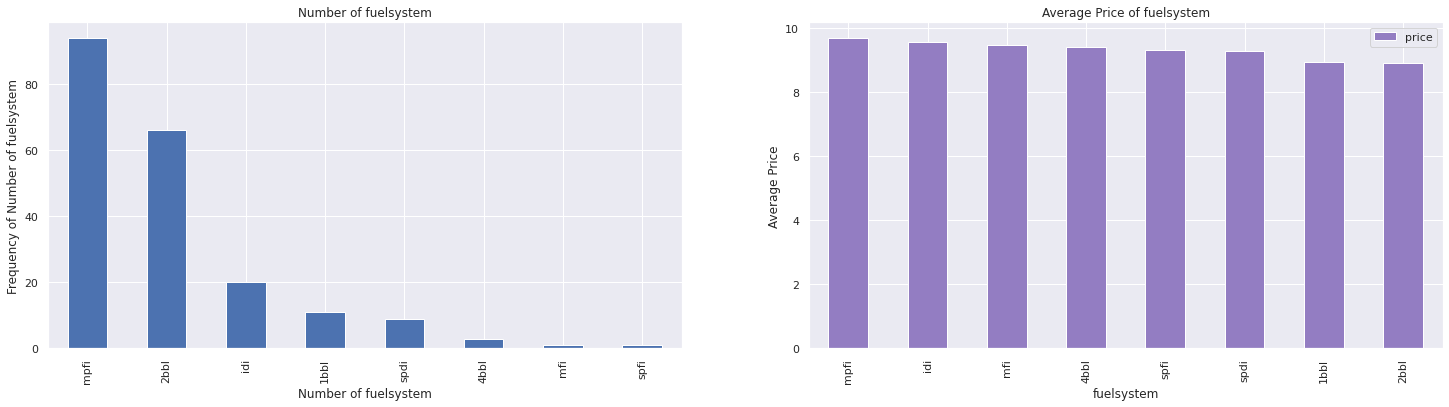

In [ ]:
plt.figure(figsize=(25, 6))

plt.subplot(1,2,1)
plt1 = data['fuelsystem'].value_counts().plot(kind='bar')
plt.title('Number of fuelsystem')
plt1.set(xlabel = 'Number of fuelsystem', ylabel='Frequency of Number of fuelsystem')

plt.subplot(1,2,2)
df = data.groupby(['fuelsystem'])['price'].mean().sort_values(ascending = False)
plt1 = df.plot(kind='bar', stacked=True, color='#937DC2')
plt.legend()
plt.title('Average Price of fuelsystem')
plt1.set(xlabel = 'fuelsystem', ylabel = 'Average Price')




- jumlah mobil dengan Fuelsystem mpfi lebih banyak, dan yang paling sedikit yaitu spfi
- Dataset memiliki 8 fuelsystem yang berbeda dan rata-rata harga di antaranya tidak terlalu berbeda

### Categorical Features VS Price

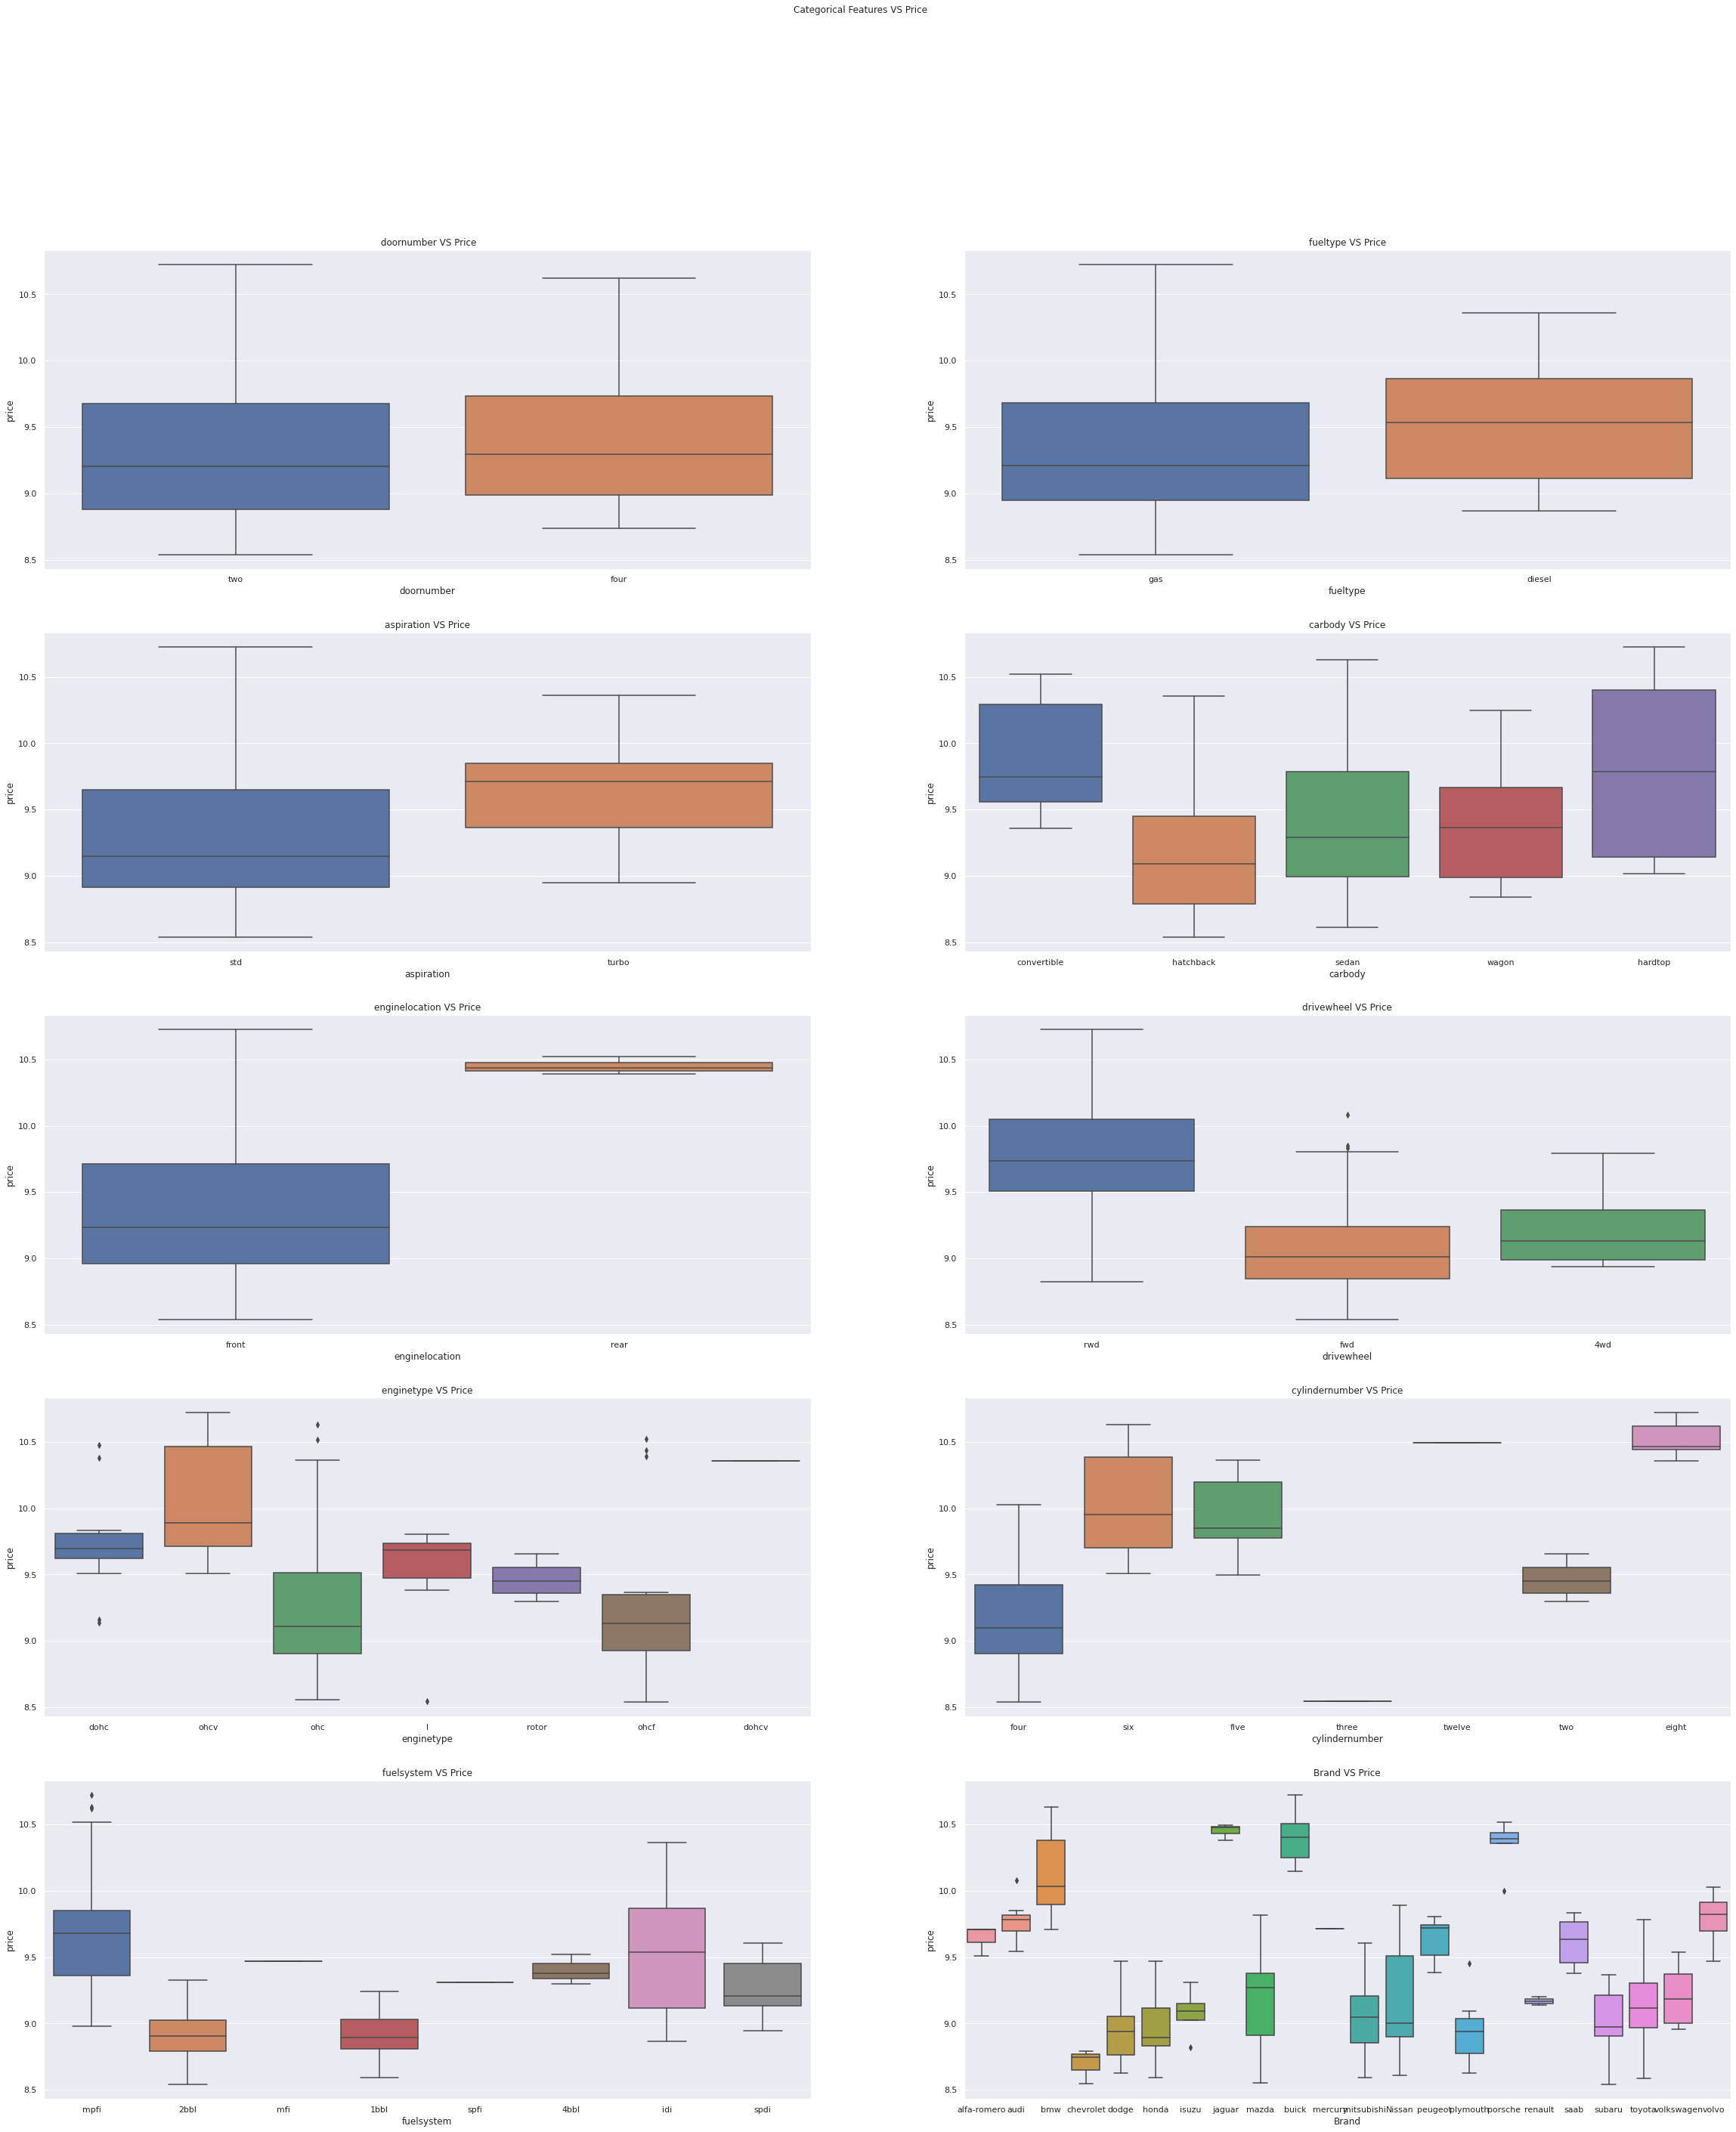

In [ ]:
plt.figure(figsize=(40, 45))
plt.suptitle('Categorical Features VS Price')

plt.subplot(5,2,1)
sns.boxplot(x = 'doornumber', y = 'price', data = data)
plt.title(" doornumber VS Price")

plt.subplot(5,2,2)
sns.boxplot(x = 'fueltype', y = 'price', data = data)
plt.title("fueltype VS Price")

plt.subplot(5,2,3)
sns.boxplot(x = 'aspiration', y = 'price', data = data)
plt.title("aspiration VS Price")

plt.subplot(5,2,4)
sns.boxplot(x = 'carbody', y = 'price', data = data)
plt.title("carbody VS Price")

plt.subplot(5,2,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = data)
plt.title("enginelocation VS Price")

plt.subplot(5,2,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = data)
plt.title("drivewheel VS Price")

plt.subplot(5,2,7)
sns.boxplot(x = 'enginetype', y = 'price', data = data)
plt.title("enginetype VS Price")

plt.subplot(5,2,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = data)
plt.title("cylindernumber VS Price")

plt.subplot(5,2,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = data)
plt.title("fuelsystem VS Price")

plt.subplot(5,2,10)
sns.boxplot(x = 'Brand', y = 'price', data = data)
plt.title("Brand VS Price")

plt.show()


##### Insights

- The cars with fueltype as diesel are comparatively expensive than the cars with fueltype as gas.
- All the types of carbody is relatively cheaper as compared to convertible carbody.
- The cars with rear enginelocation are way expensive than cars with front enginelocation.
- The price of car is directly proportional to no. of cylinders in most cases.
- Enginetype ohcv comes into higher price range cars.
- DoorNumber isn't affecting the price much.
- rwd drivewheel seems more expensive than other drivewheels



## NUMERICAL FEATURES

- Let's observe the correlation among the numerical features
- And also observe the correlation with the target variable

### NUMERICAL COLUMN

In [ ]:
numerical_cols=data.select_dtypes(exclude=['object']).columns

In [ ]:
data[numerical_cols].head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,4.495355,168.8,4.175925,48.8,2548,4.875197,3.47,2.68,2.302585,4.718499,5000,21,27,9.510149
1,3,4.495355,168.8,4.175925,48.8,2548,4.875197,3.47,2.68,2.302585,4.718499,5000,21,27,9.711176
2,1,4.559126,171.2,4.197202,52.4,2823,5.030438,2.68,3.47,2.302585,5.043425,5000,19,26,9.711176
3,2,4.613138,176.6,4.207673,54.3,2337,4.700480,3.19,3.40,2.397895,4.634729,5500,24,30,9.543306
4,2,4.609162,176.6,4.210645,54.3,2824,4.919981,3.19,3.40,2.197225,4.753590,5500,18,22,9.767152


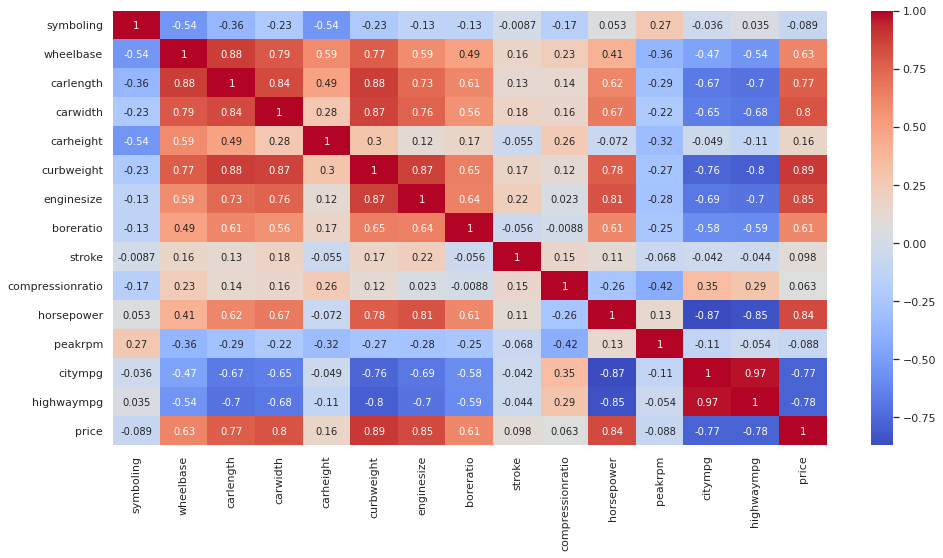

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(),annot=True, cmap='coolwarm')

#data.corr('spearman') ##korelasi di data numerical

##### Insight :
- carwidth , carlength , curbweight , enginesize , horsepower, wheelbase, dan boreratio memiliki korelasi positif dengan price.
- carheight tidak menunjukkan tren yang signifikan dengan price.
- citympg , highwaympg, peakrpm dan symboling memiliki korelasi negatif yang signifikan dengan price.




## Curbweigth VS Price VS Fueltype VS Carbody

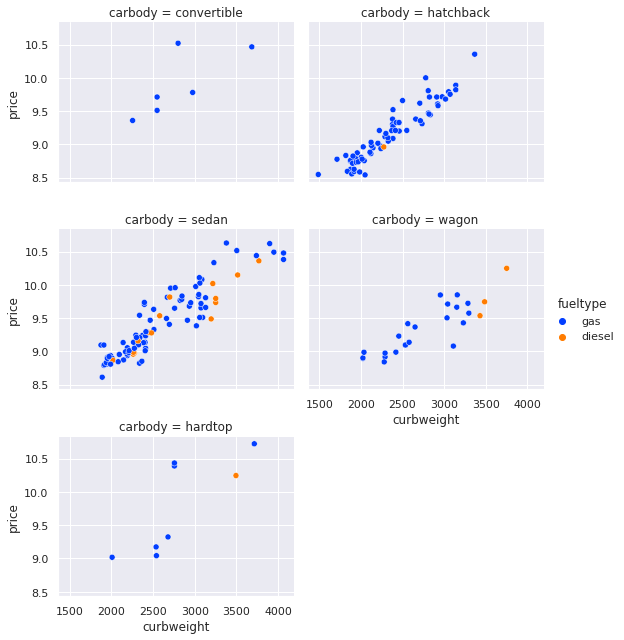

In [ ]:
sns.relplot(
    x='curbweight', 
    y='price', 
    data=data,
    palette='bright',
    height=3, aspect=1.3,
    kind='scatter', 
    hue='fueltype',
    col='carbody',
    col_wrap=2)

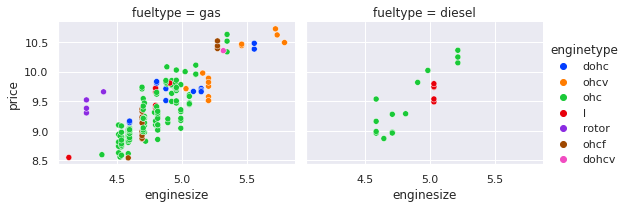

In [ ]:
sns.relplot(
    x='enginesize', 
    y='price', 
    data=data,
    palette='bright',
    height=3, aspect=1.3,
    kind='scatter', 
    hue='enginetype',
    col='fueltype',
    col_wrap=2)

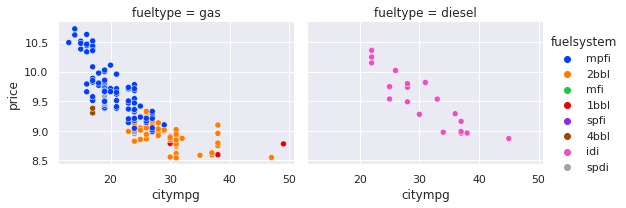

In [ ]:
sns.relplot(
    x='citympg', 
    y='price', 
    data=data,
    palette='bright',
    height=3, aspect=1.3,
    kind='scatter', 
    hue='fuelsystem',
    col='fueltype',
    col_wrap=2)

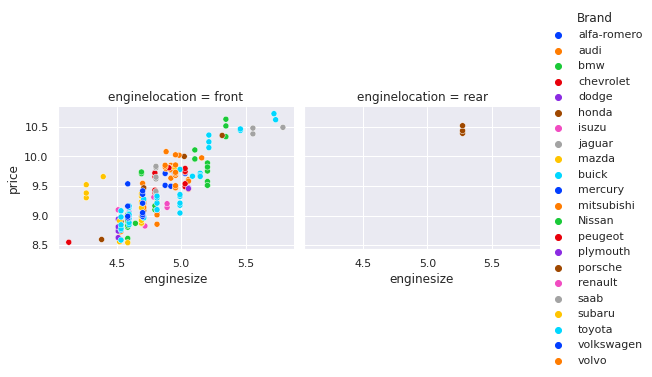

In [ ]:
sns.relplot(
    x='enginesize', 
    y='price', 
    data=data,
    palette='bright',
    height=3, aspect=1.3,
    kind='scatter', 
    hue='Brand',
    col='enginelocation',
    col_wrap=2)

In [ ]:
data.enginesize.head()

0    4.875197
1    4.875197
2    5.030438
3    4.700480
4    4.919981
Name: enginesize, dtype: float64

**MAHAL VS MURAH CAR PRICE**

In [ ]:
mahal = data.loc[(data['Brand']== 'jaguar') | (data['Brand']== 'buick') | (data['Brand']== 'porsche')]
mahal.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand
47,0,gas,std,four,sedan,rwd,front,4.736198,199.6,4.257030,52.8,4066,dohc,six,5.556828,mpfi,3.63,4.17,2.208274,5.176150,4750,15,19,10.381304,jaguar
48,0,gas,std,four,sedan,rwd,front,4.736198,199.6,4.257030,52.8,4066,dohc,six,5.556828,mpfi,3.63,4.17,2.208274,5.176150,4750,15,19,10.478724,jaguar
49,0,gas,std,two,sedan,rwd,front,4.634729,191.7,4.271095,47.8,3950,ohcv,twelve,5.789960,mpfi,3.54,2.76,2.525729,5.572154,5000,13,17,10.491302,jaguar
67,-1,diesel,turbo,four,sedan,rwd,front,4.709530,190.9,4.266896,56.5,3515,ohc,five,5.214936,idi,3.58,3.64,3.113515,4.820282,4350,22,25,10.148510,buick
68,-1,diesel,turbo,four,wagon,rwd,front,4.709530,190.9,4.266896,58.7,3750,ohc,five,5.214936,idi,3.58,3.64,3.113515,4.820282,4350,22,25,10.248813,buick


Text(0.5, 1.0, 'fuelsystem Analysis')

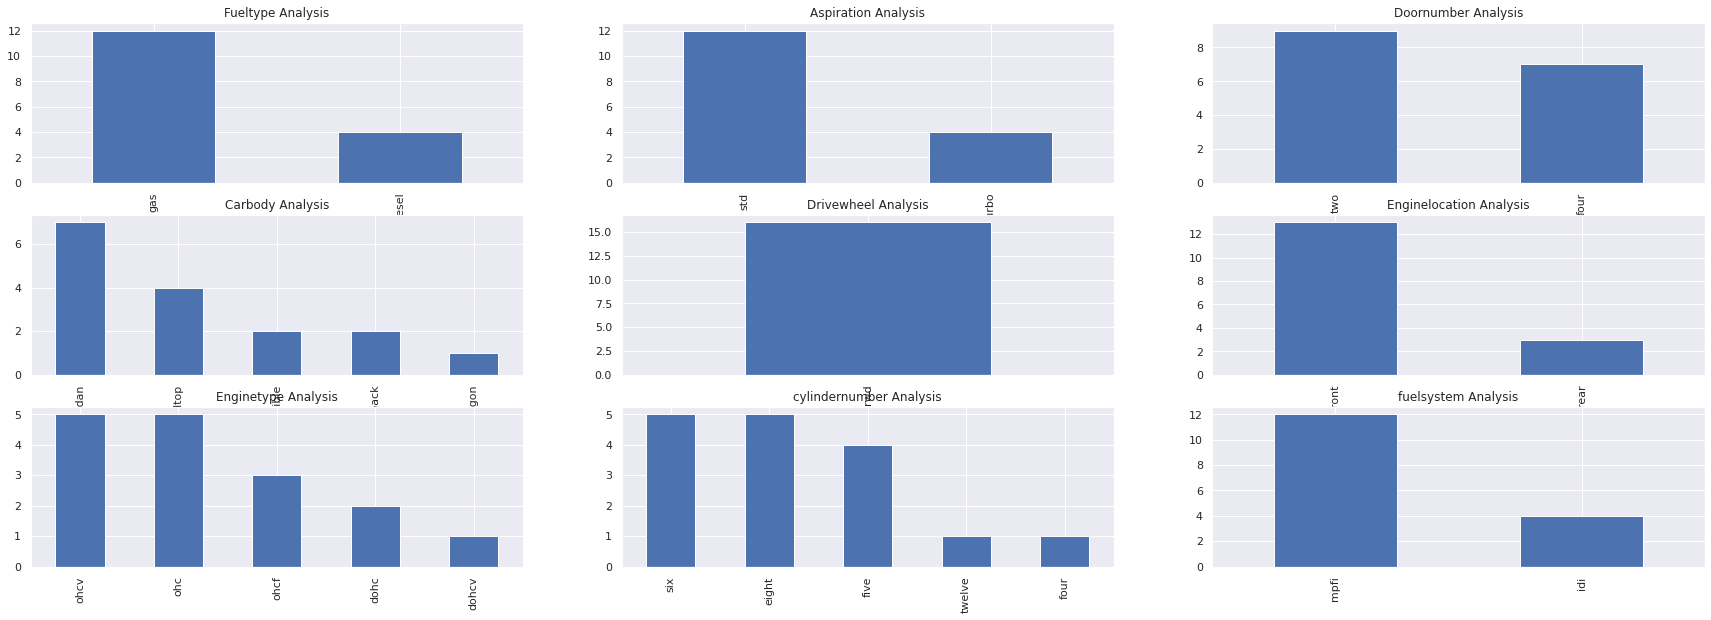

In [ ]:
plt.figure(figsize=(30, 10))

plt.subplot(3,3,1)
plt1 = mahal['fueltype'].value_counts().plot(kind='bar')
plt.title('Fueltype Analysis')

plt.subplot(3,3,2)
plt1 = mahal['aspiration'].value_counts().plot(kind='bar')
plt.title('Aspiration Analysis')

plt.subplot(3,3,3)
plt1 = mahal['doornumber'].value_counts().plot(kind='bar')
plt.title('Doornumber Analysis')

plt.subplot(3,3,4)
plt1 = mahal['carbody'].value_counts().plot(kind='bar')
plt.title('Carbody Analysis')

plt.subplot(3,3,5)
plt1 = mahal['drivewheel'].value_counts().plot(kind='bar')
plt.title('Drivewheel Analysis')

plt.subplot(3,3,6)
plt1 = mahal['enginelocation'].value_counts().plot(kind='bar')
plt.title('Enginelocation Analysis')

plt.subplot(3,3,7)
plt1 = mahal['enginetype'].value_counts().plot(kind='bar')
plt.title('Enginetype Analysis')

plt.subplot(3,3,8)
plt1 = mahal['cylindernumber'].value_counts().plot(kind='bar')
plt.title('cylindernumber Analysis')

plt.subplot(3,3,9)
plt1 = mahal['fuelsystem'].value_counts().plot(kind='bar')
plt.title('fuelsystem Analysis')

In [ ]:
murah = data.loc[(data['Brand']== 'plymouth') | (data['Brand']== 'dodge') | (data['Brand']== 'chevrolet')]
murah.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand
18,2,gas,std,two,hatchback,fwd,front,4.493121,141.1,4.115780,53.2,1488,l,three,4.127134,2bbl,2.91,3.03,2.351375,3.891820,5100,47,53,8.547140,chevrolet
19,1,gas,std,two,hatchback,fwd,front,4.559126,155.9,4.168214,52.0,1874,ohc,four,4.510860,2bbl,3.03,3.11,2.360854,4.262680,5400,38,43,8.747670,chevrolet
20,0,gas,std,four,sedan,fwd,front,4.559126,158.8,4.168214,52.0,1909,ohc,four,4.510860,2bbl,3.03,3.11,2.360854,4.262680,5400,38,43,8.791182,chevrolet
21,1,gas,std,two,hatchback,fwd,front,4.550714,157.3,4.171306,50.8,1876,ohc,four,4.510860,2bbl,2.97,3.23,2.342767,4.234107,5500,37,41,8.625689,dodge
22,1,gas,std,two,hatchback,fwd,front,4.550714,157.3,4.171306,50.8,1876,ohc,four,4.510860,2bbl,2.97,3.23,2.341806,4.234107,5500,31,38,8.760610,dodge


Text(0.5, 1.0, 'fuelsystem Analysis')

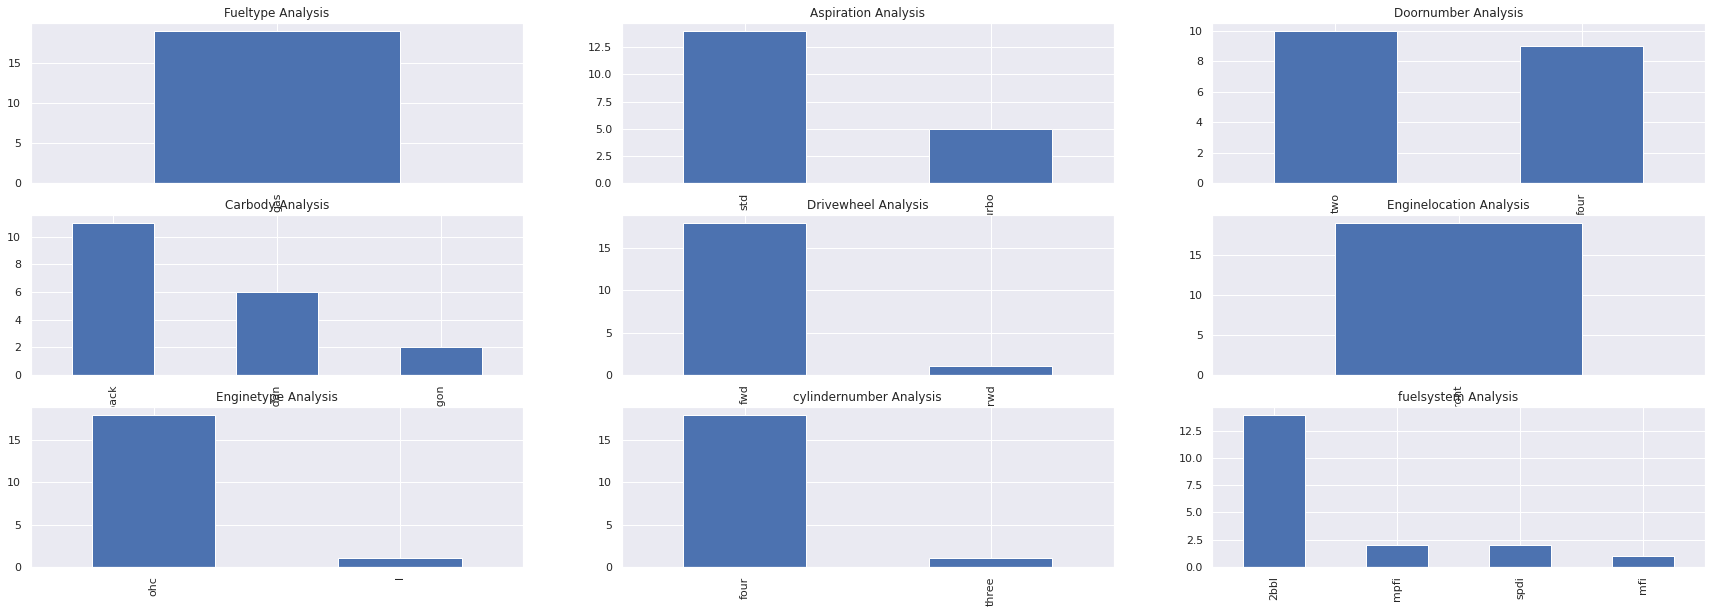

In [ ]:
plt.figure(figsize=(30, 10))

plt.subplot(3,3,1)
plt1 = murah['fueltype'].value_counts().plot(kind='bar')
plt.title('Fueltype Analysis')

plt.subplot(3,3,2)
plt1 = murah['aspiration'].value_counts().plot(kind='bar')
plt.title('Aspiration Analysis')

plt.subplot(3,3,3)
plt1 = murah['doornumber'].value_counts().plot(kind='bar')
plt.title('Doornumber Analysis')

plt.subplot(3,3,4)
plt1 = murah['carbody'].value_counts().plot(kind='bar')
plt.title('Carbody Analysis')

plt.subplot(3,3,5)
plt1 = murah['drivewheel'].value_counts().plot(kind='bar')
plt.title('Drivewheel Analysis')

plt.subplot(3,3,6)
plt1 = murah['enginelocation'].value_counts().plot(kind='bar')
plt.title('Enginelocation Analysis')

plt.subplot(3,3,7)
plt1 = murah['enginetype'].value_counts().plot(kind='bar')
plt.title('Enginetype Analysis')

plt.subplot(3,3,8)
plt1 = murah['cylindernumber'].value_counts().plot(kind='bar')
plt.title('cylindernumber Analysis')

plt.subplot(3,3,9)
plt1 = murah['fuelsystem'].value_counts().plot(kind='bar')
plt.title('fuelsystem Analysis')

# FEATURE SELECTION 1

Metode pemilihan fitur dimaksudkan untuk mengurangi jumlah variabel input menjadi variabel yang diyakini paling berguna bagi model untuk memprediksi variabel target.

In [ ]:

X=data[numerical_cols].drop('price',axis=1)
y=data['price']


## Recursive feature elimination (RFE) with random forest

In [ ]:

X = data.apply(lambda col: preprocessing.LabelEncoder().fit_transform(col))
X=X.drop(['price'],axis=1)
y=data['price']


In [ ]:

# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestRegressor()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=15, step=1)
rfe = rfe.fit(X, y)
print('Chosen best 15 feature by rfe:',X.columns[rfe.support_])


Chosen best 15 feature by rfe: Index(['carbody', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'Brand'],
      dtype='object')


In [ ]:
#features=list(X.columns[rfe.support_])

In [ ]:
#feature selection 1
sig_col = ['price','carbody', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'fuelsystem', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'Brand']

# FEATURE SELECTION 2 (OPTIONAL)

Berdasarkan visualisasi yang telah dilakukan, maka ada beberapa fitur yang dapat dijadikan sebagai prediktor

In [ ]:

#feature selection 2
#sig_col = ['price','enginetype','fueltype', 'aspiration','carbody','cylindernumber', 'drivewheel',
 #          'citympg', 'highwaympg','curbweight', 'enginesize','horsepower', 'carlength','carwidth', 'enginelocation']


## ONE HOT ENCODING

In [ ]:
data = data[sig_col]

In [ ]:

#pilih kolom kategorical dari feature selection 1 sebelumnya
sig_cat_col = ['carbody','Brand','fuelsystem']


In [ ]:

#pilih kolom kategorical dari feature selection 2 sebelumnya
#sig_cat_col = ['fueltype','aspiration','carbody','drivewheel','enginetype','cylindernumber','enginelocation']

In [ ]:
# Get the dummy variables for the categorical feature and store it in a new variable - 'dummies'

dummies = pd.get_dummies(data[sig_cat_col])
dummies.shape

(205, 35)

In [ ]:
dummies = pd.get_dummies(data[sig_cat_col], drop_first = True)
dummies.shape

(205, 32)

In [ ]:
# Add the results to the original dataframe

data = pd.concat([data, dummies], axis = 1)

In [ ]:
# Drop the original cat variables as dummies are already created

data.drop( sig_cat_col, axis = 1, inplace = True)
data.shape

(205, 45)

In [ ]:
data.head()

,price,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,Brand_alfa-romero,Brand_audi,Brand_bmw,Brand_buick,Brand_chevrolet,Brand_dodge,Brand_honda,Brand_isuzu,Brand_jaguar,Brand_mazda,Brand_mercury,Brand_mitsubishi,Brand_peugeot,Brand_plymouth,Brand_porsche,Brand_renault,Brand_saab,Brand_subaru,Brand_toyota,Brand_volkswagen,Brand_volvo,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,9.510149,4.495355,168.8,4.175925,48.8,2548,4.875197,2.68,2.302585,4.718499,5000,21,27,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,9.711176,4.495355,168.8,4.175925,48.8,2548,4.875197,2.68,2.302585,4.718499,5000,21,27,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,9.711176,4.559126,171.2,4.197202,52.4,2823,5.030438,3.47,2.302585,5.043425,5000,19,26,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,9.543306,4.613138,176.6,4.207673,54.3,2337,4.700480,3.40,2.397895,4.634729,5500,24,30,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,9.767152,4.609162,176.6,4.210645,54.3,2824,4.919981,3.40,2.197225,4.753590,5500,18,22,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


# TRAIN TEST SPLIT

In [ ]:
# defining feature matrix(X) and response vector(y)
#x = X[features]
#y = data.price

x = data.drop('price',axis=1)
y = data['price']


In [ ]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4,
                                                    random_state=1)

# DATA MODELLING

In [ ]:


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error as mse

In [ ]:
def k_fold_eval(model):
    kf = KFold(n_splits = 5)
    RMSE_length = 5
    RMSE_list = []
    
    for i, (train, val) in enumerate(kf.split(x_train)):
        train_features = x_train.iloc[train]
        train_target = y_train.iloc[train]
        
        val_features = x_train.iloc[val]
        val_target = y_train.iloc[val]
        
        ml_model = model.fit(train_features, train_target)
        prediction = ml_model.predict(val_features)
        
        rmse_score = np.sqrt(mse(val_target, prediction))
        RMSE_list.append(rmse_score)
    
    
   
    print('')
    print(f'RMSE Scores: {RMSE_list}')
    
    print('')
    print(f'Average RMSE Score: {np.mean(RMSE_list)}')
    print('')
    
    ml_model_final = model.fit(x_train, y_train)
    test_prediction = ml_model_final.predict(x_test)
    rmse_final = np.sqrt(mse(y_test, test_prediction))
    
    
    
    
    y_test_pred = model.predict(x_test)
    #print('Coefficients :' , model.coef_)
    print('')
    #print('Intercept :' , model.intercept_)
    print('')
    print('MAE Evaluate : ', mean_absolute_error(y_test, y_test_pred))
    print('')
    print('MSE Evaluate : ', mean_squared_error(y_test, y_test_pred))
    print('')
    print(f'RMSE Evaluate on Test Set: {rmse_final}')
    print('')
    print(f'R2 Score :', model.score(x_test, y_test))
    print('')
    print('Model Accuration  :', r2_score(y_test,y_test_pred))
    
    return ml_model_final

## LINEAR REGRESSION

In [ ]:
linear_reg = k_fold_eval(LinearRegression())


RMSE Scores: [0.17600318874976056, 0.16501664670461552, 0.1872654902423828, 0.21623897874388603, 0.19428410191340473]

Average RMSE Score: 0.18776168127080992



MAE Evaluate :  0.10998697465318198

MSE Evaluate :  0.020151677362686915

RMSE Evaluate on Test Set: 0.1419566038009043

R2 Score : 0.9195818581373567

Model Accuration  : 0.9195818581373567


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

## RIDGE REGRESSION

In [ ]:
ridge_reg = k_fold_eval(Ridge())


RMSE Scores: [0.16471283145589852, 0.14207586342831724, 0.14518659674505047, 0.18377295386102752, 0.1370333169152266]

Average RMSE Score: 0.15455631248110407



MAE Evaluate :  0.10269631691215164

MSE Evaluate :  0.01699525184226297

RMSE Evaluate on Test Set: 0.1303658384787325

R2 Score : 0.9321780242386621

Model Accuration  : 0.9321780242386621


## LASSO

In [ ]:
lasso_reg = k_fold_eval(Lasso())


RMSE Scores: [0.28660902832891116, 0.23865153803846606, 0.24047488634154332, 0.24667289216039257, 0.1405481603942862]

Average RMSE Score: 0.2305913010527199



MAE Evaluate :  0.1460779456937348

MSE Evaluate :  0.034512080326487546

RMSE Evaluate on Test Set: 0.1857742725096442

R2 Score : 0.8622746225180553

Model Accuration  : 0.8622746225180553


## ELASTIC NET

In [ ]:
elastic_net = k_fold_eval(ElasticNet())


RMSE Scores: [0.28707532618537446, 0.23855750580650323, 0.2401500296558963, 0.24647526174970835, 0.14051437173641762]

Average RMSE Score: 0.23055449902678



MAE Evaluate :  0.1463852172447328

MSE Evaluate :  0.03464440462222551

RMSE Evaluate on Test Set: 0.18613007447004773

R2 Score : 0.8617465635483225

Model Accuration  : 0.8617465635483225


## DECISION TREE REGRESSOR

In [ ]:
dt_regressor = k_fold_eval(DecisionTreeRegressor())


RMSE Scores: [0.22237297606079212, 0.20224090053820581, 0.2381142765504681, 0.21416902251970402, 0.1659049505364335]

Average RMSE Score: 0.20856042524112076



MAE Evaluate :  0.13074797994329523

MSE Evaluate :  0.0322557649419603

RMSE Evaluate on Test Set: 0.17959890016912772

R2 Score : 0.8712787707789713

Model Accuration  : 0.8712787707789713


## RANDOM FOREST REGRESSOR

In [ ]:
Rf = k_fold_eval(RandomForestRegressor())


RMSE Scores: [0.15129118341719183, 0.18377846399828943, 0.1810545635621437, 0.15505956809138677, 0.11787047264809722]

Average RMSE Score: 0.1578108503434218



MAE Evaluate :  0.10059872285041173

MSE Evaluate :  0.017260053806169295

RMSE Evaluate on Test Set: 0.131377523976399

R2 Score : 0.9311212942446441

Model Accuration  : 0.9311212942446441


- Berdasarkan hasil evaluasi modelling yang dilakukan, ternyata model **Ridge Regression** memiliki tingkat error pada RMSE paling minimal dan tingkat akurasi pada R2 lebih tinggi dibandingkan 5 model lainnya
- Oleh karena itu, maka final model yang akan digunakan adalah **Ridge Regression**

# HYPERPARAMETER TUNING

- Hyperparameter Tuning adalah upaya TERAKHIR untuk meningkatkan akurasi model yang DIPILIH.

## RIDGE REGRESSION

In [ ]:
from sklearn.linear_model import Ridge
model = Ridge()
#alpha=0.1, normalize=False, tol=1e-06
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(f'MAE Evaluate on Test Set: {mean_absolute_error(y_test, y_pred)}') #MAE
print(f'MSE Evaluate on Test Set: {mean_squared_error(y_test, y_pred)}') #MSE
print(f'RMSE Evaluate on Test Set: {mean_squared_error(y_test, y_pred, squared=False)}') #RMSE
print(f'Score Evaluate on Test Set: {model.score(x_test,y_test)}') #Model Score

MAE Evaluate on Test Set: 0.10269631691215164
MSE Evaluate on Test Set: 0.01699525184226297
RMSE Evaluate on Test Set: 0.1303658384787325
Score Evaluate on Test Set: 0.9321780242386621


hasil evaluasi sebelum diberikan hyperparameter tuning

In [ ]:
def get_best_score(grid):
    
    best_score = np.sqrt(-grid.best_score_)
    print(best_score)    
    print(grid.best_params_)
    print(grid.best_estimator_)
    
    return best_score


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
score_calc = 'neg_mean_squared_error'

ridge = Ridge()
parameters = {'alpha':[0.001,0.005,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], 'normalize':[True,False], 'tol':[1e-06,5e-06,1e-05,5e-05]}
grid_ridge = GridSearchCV(ridge, parameters, cv=3, verbose=1, scoring = score_calc)
grid_ridge.fit(x, y)

sc_ridge = get_best_score(grid_ridge)

Fitting 3 folds for each of 104 candidates, totalling 312 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

0.22009838509876534
{'alpha': 1, 'normalize': False, 'tol': 1e-06}
Ridge(alpha=1, normalize=False, tol=1e-06)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave 

melalui proses diatas, didapatkan parameter : {'alpha': 1, 'normalize': False, 'tol': 1e-06}.
mari aplikasikan kedalam model ridge

In [ ]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.9, normalize=False, tol=1e-06)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(f'MAE Evaluate on Test Set: {mean_absolute_error(y_test, y_pred)}') #MAE
print(f'MSE Evaluate on Test Set: {mean_squared_error(y_test, y_pred)}') #MSE
print(f'RMSE Evaluate on Test Set: {mean_squared_error(y_test, y_pred, squared=False)}') #RMSE
print(f'Score Evaluate on Test Set: {model.score(x_test,y_test)}') #Model Score

MAE Evaluate on Test Set: 0.10219004949289658
MSE Evaluate on Test Set: 0.016951953384178597
RMSE Evaluate on Test Set: 0.13019966737353286
Score Evaluate on Test Set: 0.9323508129094014


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


In [ ]:
print('Improvement of RMSE:', ((0.13036583847873248 - 0.13019966737353336)/0.13036583847873248)*100, '%')

Improvement of RMSE: 0.12746522182360576 %
